In [2]:
import pandas as pd
import os
import pandas as pd
#!pip install PyPDF2
from PyPDF2 import PdfReader
from transformers import pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [3]:


# function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text.strip()

# DataFrame to store the extracted data
columns = ["document","category"]
data = []

# Iterate over the PDF files and extract text
dataset_dir = r"/content/drive/MyDrive/documnet_clasification/dataset/dataset_pdf"
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        for file_name in os.listdir(category_dir):
            if file_name.endswith(".pdf"):
                pdf_path = os.path.join(category_dir, file_name)
                document = extract_text_from_pdf(pdf_path)
                data.append([document,category])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

print(df.head())

                                            document category
0  dominici backs lacklustre france wing christop...    sport
1  o gara revels in ireland victory ireland fly-h...    sport
2  candela completes bolton switch bolton boss sa...    sport
3  owen determined to stay in madrid england forw...    sport
4  paris promise raises welsh hopes has there bee...    sport


In [4]:
#defintion to select minimum sample from data
def generate_sample(df, samples_from_each_category):
  # Group the dataframe by the 'category' column
  grouped = df.groupby('category')

  # Initialize an empty list to store the sub-dataframes
  subdfs = []

  # Iterate over each group
  for _, group_df in grouped:
      # Randomly select 100 rows from each group
      subdf = group_df.sample(n=samples_from_each_category, random_state=42)  # You can change the random_state if you want different random samples
      # Append the sub-dataframe to the list
      subdfs.append(subdf)

  # Concatenate all sub-dataframes into one dataframe
  sub_dataframe = pd.concat(subdfs)

  # Reset index of the sub-dataframe
  sub_dataframe = sub_dataframe.reset_index(drop=True)

  # Now sub_dataframe contains 100 randomly selected rows from each category
  #sub_dataframe.to_csv("sample_doc_data.csv")
  return sub_dataframe

In [5]:
#df = pd.read_csv("/content/drive/MyDrive/documnet_clasification/dataset/sample_doc_data.csv")
samples_from_each_category = 5
df = generate_sample(df, samples_from_each_category)
df

,document,category
0,ec calls truce in deficit battle the european ...,business
1,dollar drops on reserves concerns the us dolla...,business
2,jobs growth still slow in the us the us create...,business
3,ban on forced retirement under 65 employers wi...,business
4,sa unveils more for all budget the south afr...,business
5,deal to ban homophobic reggae the reggae ind...,entertainment
6,the comic book genius of stan lee stan lee th...,entertainment
7,school tribute for tv host carson more than 1 ...,entertainment
8,doves soar to uk album summit manchester rock ...,entertainment
9,cage film s third week at us top nicolas cage ...,entertainment


In [6]:
df.category.unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [7]:
candidate_labels = ['business', 'entertainment', 'politics', 'sport', 'tech']
candidate_labels

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
# from transformers import pipeline

# def classify_using_llm(document,candidate_labels):
#     # Initialize the document classification pipeline
#     document_classifier = pipeline("zero-shot-classification")
#     result = document_classifier(document, candidate_labels)
#     return result['labels'][0],result['scores'][0]

In [18]:
from transformers import pipeline, BartForSequenceClassification, BartTokenizer

# Load BART model and tokenizer
bart_model = BartForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-mnli")

def classify_using_llm(document, candidate_labels):
    # Initialize the document classification pipeline with BART model
    document_classifier = pipeline("zero-shot-classification", model=bart_model, tokenizer=bart_tokenizer)
    result = document_classifier(document, candidate_labels)
    return result['labels'][0]#, result['scores'][0]

In [16]:
document = df["document"][0]
classify_using_llm(document, candidate_labels)

('business', 0.5236622095108032)

In [20]:
df['classified_label'] = df.apply(lambda x: classify_using_llm(x['document'], candidate_labels), axis=1)

In [21]:
df


,category,document,classified_label
0,business,irish company hit by iraqi report shares in ir...,business
1,business,bat spit drug firm goes to market a german fir...,business
2,business,electronics firms eye plasma deal consumer ele...,business
3,business,circuit city gets takeover offer circuit city ...,business
4,business,weak dollar hits reuters revenues at media gro...,business
5,business,brewers profits lose their fizz heineken and ...,business
6,business,call centre users lose patience customers tr...,business
7,business,uk bank seals south korean deal uk-based bank ...,business
8,business,wall street cool to ebay s profit shares in on...,business
9,business,dollar slides ahead of new year the us dollar ...,business


In [22]:
df.columns

Index(['category', 'document', 'classified_label'], dtype='object')

In [23]:
df =df[['document','category',  'classified_label']]
df

,document,category,classified_label
0,irish company hit by iraqi report shares in ir...,business,business
1,bat spit drug firm goes to market a german fir...,business,business
2,electronics firms eye plasma deal consumer ele...,business,business
3,circuit city gets takeover offer circuit city ...,business,business
4,weak dollar hits reuters revenues at media gro...,business,business
5,brewers profits lose their fizz heineken and ...,business,business
6,call centre users lose patience customers tr...,business,business
7,uk bank seals south korean deal uk-based bank ...,business,business
8,wall street cool to ebay s profit shares in on...,business,business
9,dollar slides ahead of new year the us dollar ...,business,business


Confusion Matrix:
[[10  0  0  0  0]
 [ 4  5  0  0  1]
 [ 1  0  9  0  0]
 [ 5  0  0  5  0]
 [ 4  3  0  0  3]]

Accuracy: 0.64
Precision: 0.7583333333333334
Recall: 0.64


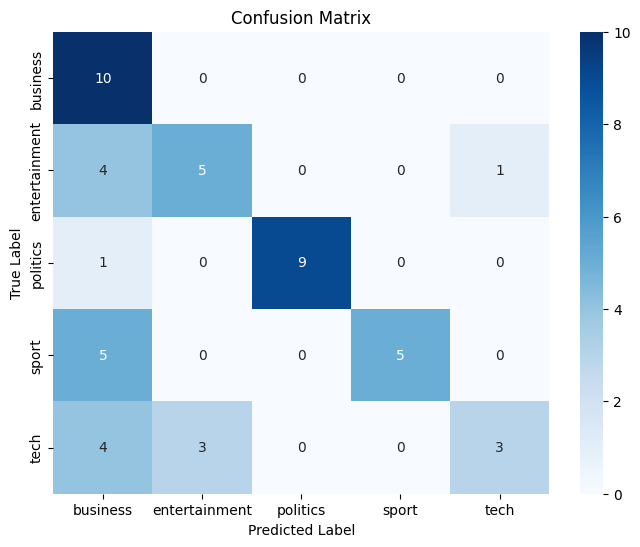

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(df['category'], df['classified_label'])

# Get unique class labels from the dataframe
classes = df['category'].unique()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Compute accuracy, precision, and recall
accuracy = accuracy_score(df['category'], df['classified_label'])
precision = precision_score(df['category'], df['classified_label'], average='weighted')
recall = recall_score(df['category'], df['classified_label'], average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
